In [1]:
import os 
import numpy as np 
from src import utils
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 12
fs_title = 16
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange', 'grey'] #rew #nrew #rew_test #nrew_test #GI

In [8]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
behav_sess = VG11 + VG14 + VG15

In [2]:
def plot_red_intensity(main_root, mname, datexp, blk, useratio=False, concat=False):
    behav_path = os.path.join(main_root, mname, datexp, blk, 'suite2p')
    # number of planes (directories) in the suite2p folder
    n_planes = len([name for name in os.listdir(behav_path) if os.path.isdir(os.path.join(behav_path, name))])
    fig, ax = plt.subplots(1, n_planes, figsize=(40, 2), sharey=True)
    for plane in range(n_planes):
        p = f"plane{plane}"
        plane_path = os.path.join(behav_path, p)
        ops = np.load(os.path.join(plane_path, 'ops.npy'), allow_pickle=True).item()
        iscell = np.load(os.path.join(plane_path, 'iscell.npy'), allow_pickle=True)
        if useratio:
            redcell = np.load(os.path.join(plane_path, 'redstats.npy'), allow_pickle=True)
        else:
            redcell = np.load(os.path.join(plane_path, 'redcell.npy'), allow_pickle=True)
        stat = np.load(os.path.join(plane_path, 'stat.npy'), allow_pickle=True)
        nn = redcell.shape[0]
        red_intensity = np.empty((nn))
        meanimage = ops['meanImg_chan2']
        for n in range(0,nn):
            ypix = stat[n]['ypix'][~stat[n]['overlap']]
            xpix = stat[n]['xpix'][~stat[n]['overlap']]
            red_intensity[n] = meanimage[ypix,xpix].mean()
        red_cells = (iscell[:,0] == 1) & (redcell[:,0] == 1)
        rest_cells = (iscell[:,0] == 1) & (redcell[:,0] == 0)
        ax[plane].hist(red_intensity[red_cells], bins=25, alpha=0.5, label='inhibitory cells', color='tab:red', density=True);
        ax[plane].hist(red_intensity[rest_cells], bins=25, alpha=0.5, label='excitatory cells', color='tab:blue', density=True);
        ax[plane].set_title("plane %d" % (plane))
        ax[plane].set_xlabel("mean red intensity")
    ax[-1].text(0.7, 0.9, f"Inhibitory", ha='center', va='center', transform=ax[-1].transAxes, fontsize=default_font, c='tab:red')
    ax[-1].text(0.7, 0.8, f"Excitatory", ha='center', va='center', transform=ax[-1].transAxes, fontsize=default_font, c='tab:blue')
    ax[0].set_ylabel("Density")

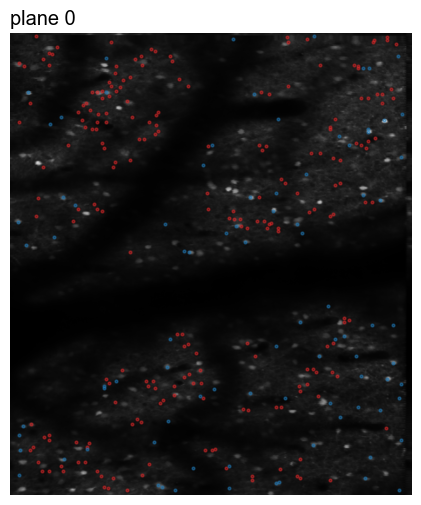

In [91]:
main_root = r"Z:\data\PROC"
mname = 'VG15'
datexp = '2024_10_15'
blk = '3'
behav_path = os.path.join(main_root, mname, datexp, blk, 'suite2p')

plane = 0
prob = None
p = f"plane{plane}"
plane_path = os.path.join(behav_path, p)
ops = np.load(os.path.join(plane_path, 'ops.npy'), allow_pickle=True).item()
iscell = np.load(os.path.join(plane_path, 'iscell.npy'), allow_pickle=True)
redcell = np.load(os.path.join(plane_path, 'redcell.npy'), allow_pickle=True)
stat = np.load(os.path.join(plane_path, 'stat.npy'), allow_pickle=True)
meanimage = ops['meanImg_chan2']
nn = redcell.shape[0]
im = np.zeros((ops['Ly'], ops['Lx']))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(meanimage, cmap='gray')
if prob is not None:
    red_cells = (iscell[:,0] == 1) & (redcell[:,1] >= prob)
else:
    red_cells = (iscell[:,0] == 1) & (redcell[:,0] == 1)
for n in range(nn):
    y,x = stat[n]['med']
    if red_cells[n] == True:
        plt.scatter(x,y, s=4, c='tab:red', alpha=0.5)
    elif iscell[n,0] == 0:
        plt.scatter(x,y, s=4, c='tab:blue', alpha=0.5)
plt.axis('off')
if prob is not None:
    plt.title(f"plane {plane} redcell prob >= {prob:.2f}");
else:
    plt.title(f"plane {plane}");

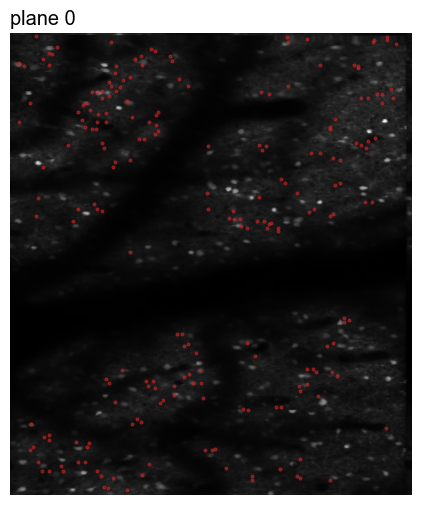

In [5]:
### local copy of the plane
plane = 0
prob = None
p = f"plane{plane}"
plane_path = r"C:\Users\labadmin\Desktop\twochan_test\2024_10_15\3\suite2p\plane0"
ops = np.load(os.path.join(plane_path, 'ops.npy'), allow_pickle=True).item()
iscell = np.load(os.path.join(plane_path, 'iscell.npy'), allow_pickle=True)
redcell = np.load(os.path.join(plane_path, 'redcell.npy'), allow_pickle=True)
stat = np.load(os.path.join(plane_path, 'stat.npy'), allow_pickle=True)
from suite2p.detection import chan2detect, anatomical
redstats = chan2detect.intensity_ratio(ops, stat)
meanimage = ops['meanImg_chan2']
nn = redcell.shape[0]
im = np.zeros((ops['Ly'], ops['Lx']))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(meanimage, cmap='gray')
if prob is not None:
    red_cells = (iscell[:,0] == 1) & (redcell[:,1] >= prob)
else:
    red_cells = (iscell[:,0] == 1) & (redcell[:,0] == 1)
for n in range(nn):
    y,x = stat[n]['med']
    if red_cells[n] == True:
        plt.scatter(x,y, s=4, c='tab:red', alpha=0.5)
    #elif iscell[n,0] == 0:
    #    plt.scatter(x,y, s=4, c='tab:blue', alpha=0.5)
plt.axis('off')
if prob is not None:
    plt.title(f"plane {plane} redcell prob >= {prob:.2f}");
else:
    plt.title(f"plane {plane}");

In [6]:
ops.keys()

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'spatial_hp_detect', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'anatomical_only', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass', 'denoise', 'soma_crop', 'neuropil

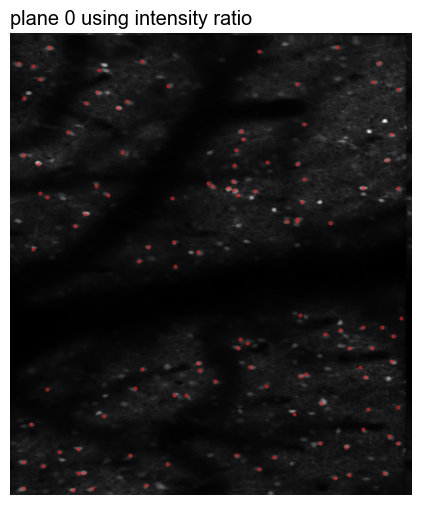

In [14]:
nn = redcell.shape[0]
im = np.zeros((ops['Ly'], ops['Lx']))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(meanimage, cmap='gray')
if prob is not None:
    red_cells = (iscell[:,0] == 1) & (redstats[:,1] >= prob)
else:
    red_cells = (iscell[:,0] == 1) & (redstats[:,0] == 1)
for n in range(nn):
    y,x = stat[n]['med']
    if red_cells[n] == True:
        plt.scatter(x,y, s=4, c='tab:red', alpha=0.5)
    #elif iscell[n,0] == 0:
    #    plt.scatter(x,y, s=4, c='tab:blue', alpha=0.5)
plt.axis('off')
if prob is not None:
    plt.title(f"plane {plane} redcell prob >= {prob:.2f} using intensity ratio");
else:
    plt.title(f"plane {plane} using intensity ratio");

C:\Users\labadmin\AppData\Local\Temp\ipykernel_25288\3455140857.py:6: RuntimeWarning: Mean of empty slice.
  red_intensity[n] = meanimage[ypix,xpix].mean()
c:\Users\labadmin\anaconda3\envs\categoryneural\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


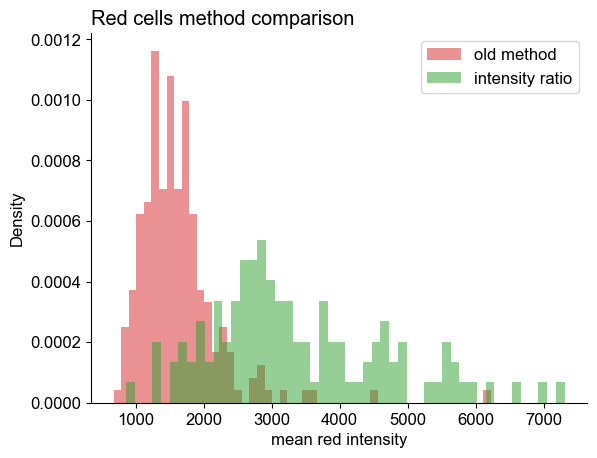

In [108]:
red_intensity = np.empty((nn))
meanimage = ops['meanImg_chan2']
for n in range(0,nn):
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    red_intensity[n] = meanimage[ypix,xpix].mean()
red_cells_old = (iscell[:,0] == 1) & (redcell[:,0] == 1)
red_cells_intensity_ratio = (iscell[:,0] == 1) & (redstats[:,0] == 1)
plt.hist(red_intensity[red_cells_old], bins=50, alpha=0.5, label='old method', color='tab:red', density=True);
plt.hist(red_intensity[red_cells_intensity_ratio], bins=50, alpha=0.5, label='intensity ratio', color='tab:green', density=True);
plt.title("Red cells method comparison")
plt.xlabel("mean red intensity")
plt.ylabel("Density")
plt.legend()

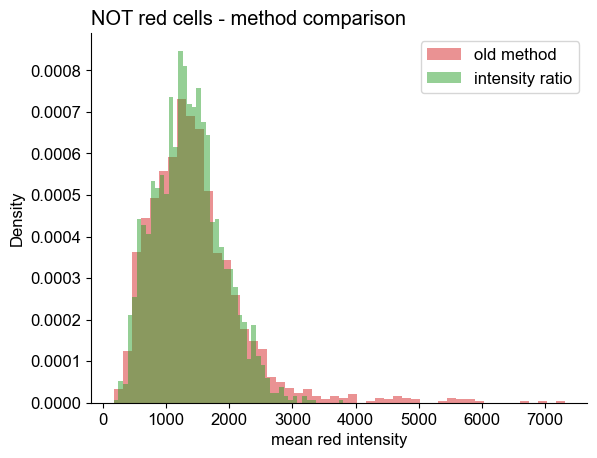

In [107]:
red_cells_old = (iscell[:,0] == 1) & (redcell[:,0] == 0)
red_cells_intensity_ratio = (iscell[:,0] == 1) & (redstats[:,0] == 0)
plt.hist(red_intensity[red_cells_old], bins=50, alpha=0.5, label='old method', color='tab:red', density=True);
plt.hist(red_intensity[red_cells_intensity_ratio], bins=50, alpha=0.5, label='intensity ratio', color='tab:green', density=True);
plt.title("NOT red cells - method comparison")
plt.xlabel("mean red intensity")
plt.ylabel("Density")
plt.legend()

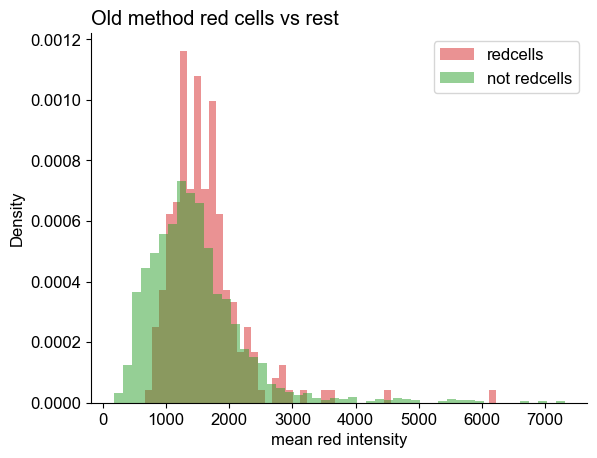

In [109]:
red_cells_old = (iscell[:,0] == 1) & (redcell[:,0] == 1)
rest_cells = (iscell[:,0] == 1) & (redcell[:,0] == 0)
plt.hist(red_intensity[red_cells_old], bins=50, alpha=0.5, label='redcells', color='tab:red', density=True);
plt.hist(red_intensity[rest_cells], bins=50, alpha=0.5, label='not redcells', color='tab:green', density=True);
plt.title("Old method red cells vs rest ")
plt.xlabel("mean red intensity")
plt.ylabel("Density")
plt.legend()

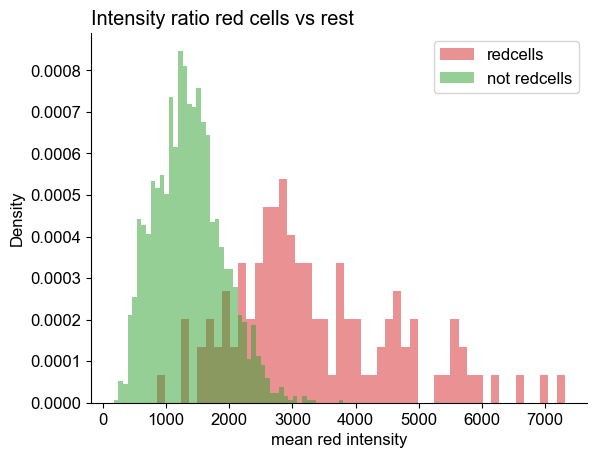

In [111]:
red_cells_old = (iscell[:,0] == 1) & (redstats[:,0] == 1)
rest_cells = (iscell[:,0] == 1) & (redstats[:,0] == 0)
plt.hist(red_intensity[red_cells_old], bins=50, alpha=0.5, label='redcells', color='tab:red', density=True);
plt.hist(red_intensity[rest_cells], bins=50, alpha=0.5, label='not redcells', color='tab:green', density=True);
plt.title("Intensity ratio red cells vs rest ")
plt.xlabel("mean red intensity")
plt.ylabel("Density")
plt.legend()

# red intensity old method

C:\Users\labadmin\AppData\Local\Temp\ipykernel_25288\530060676.py:19: RuntimeWarning: Mean of empty slice.
  red_intensity[n] = meanimage[ypix,xpix].mean()


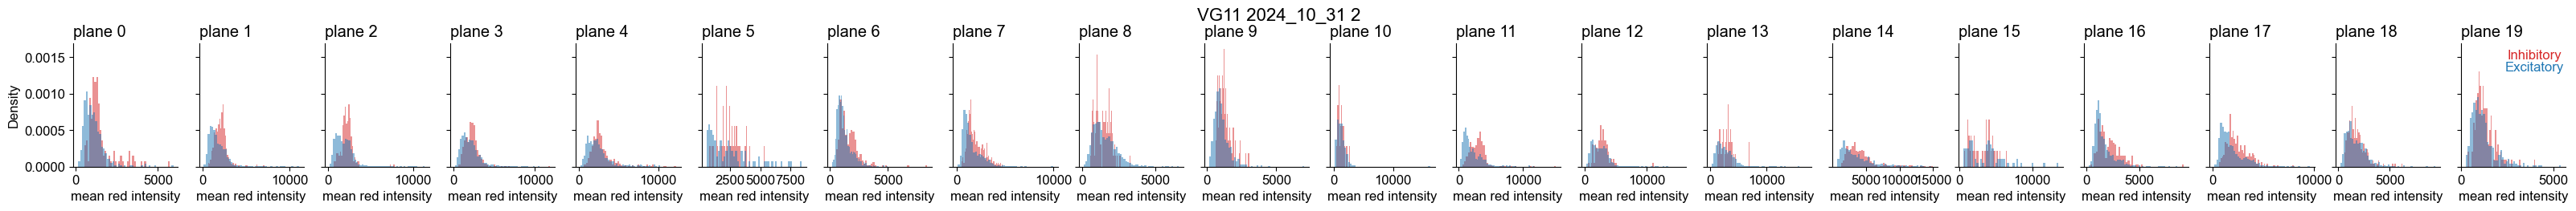

In [31]:
main_root = r"Z:\data\PROC"
mname = 'VG11'
datexp = '2024_10_31'
blk = '2'
plot_red_intensity(main_root, mname, datexp, blk)
plt.suptitle(f"{mname} {datexp} {blk}", fontsize=fs_title, y=1.10)
plt.show()

Lets fix the redcells.npy:

In [35]:
from suite2p.detection import chan2detect, anatomical
def fix_red_detection(main_root, mname, datexp, blk):
    behav_path = os.path.join(main_root, mname, datexp, blk, 'suite2p')
    # number of planes (directories) in the suite2p folder
    ops0 = np.load(os.path.join(behav_path, "plane0", 'ops.npy'), allow_pickle=True).item()
    n_planes = ops0['nplanes']
    for plane in range(n_planes):
        print("fixing red detection for animal %s, datexp %s, block %s, plane %d" % (mname, datexp, blk, plane))
        p = f"plane{plane}"
        plane_path = os.path.join(behav_path, p)
        stat = np.load(os.path.join(plane_path, 'stat.npy'), allow_pickle=True)
        ops = np.load(os.path.join(plane_path, 'ops.npy'), allow_pickle=True).item()
        redstats = chan2detect.intensity_ratio(ops, stat)
        np.save(os.path.join(plane_path, 'redcells.npy'), redstats)
        print(f"Fixed!")
        clear_output(wait=True)

In [17]:
main_root = r"Z:\data\PROC"
mname = 'VG11'
datexp = '2024_10_31'
blk = '2'
fix_red_detection(main_root, mname, datexp, blk)

redstats plane19 saved


C:\Users\labadmin\AppData\Local\Temp\ipykernel_41264\3266266978.py:22: RuntimeWarning: Mean of empty slice.
  red_intensity[n] = meanimage[ypix,xpix].mean()
c:\Users\labadmin\anaconda3\envs\categoryneural\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


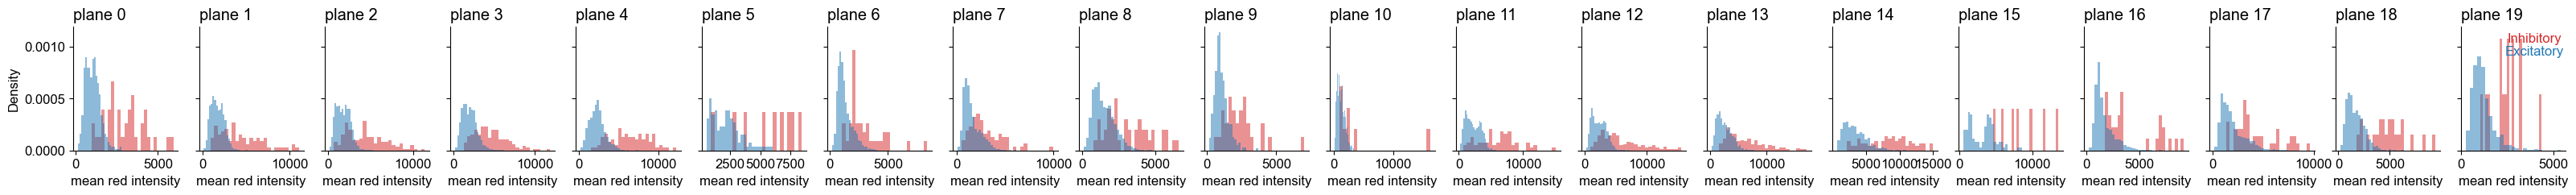

In [19]:
main_root = r"Z:\data\PROC"
mname = 'VG11'
datexp = '2024_10_31'
blk = '2'
plot_red_intensity(main_root, mname, datexp, blk, useratio=True)

In [20]:
main_root = r"Z:\data\PROC"
mname = 'VG11'
datexp = '2024_10_31'
blk = '2'
root = os.path.join(main_root, mname, datexp, blk, 'suite2p')
isredcell = np.zeros((0,2))
ops = np.load(
    os.path.join(root, "plane0", "ops.npy"), allow_pickle=True
).item()
for n in range(ops["nplanes"]):
    redcell0 = np.load(os.path.join(root, "plane%d" % n, "redstats.npy"), allow_pickle=True
)
    isredcell = np.concatenate((isredcell, redcell0), axis=0)
print(isredcell.shape)

(30674, 2)


# lets look at the spike avg per neuron and their variance

In [21]:
m = utils.load_mouse(mname, datexp, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj\notz")

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG11\2024_10_31\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])


Activit with previous method:

Text(0.5, 0, 'variance spk rate')

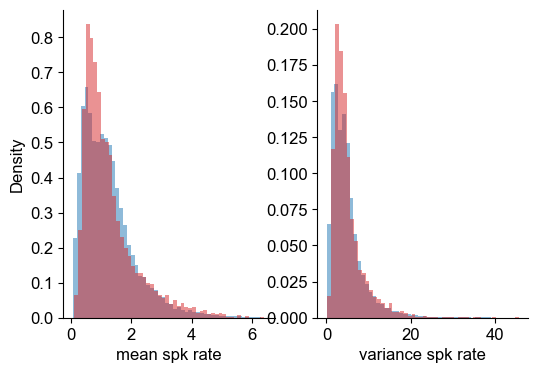

In [22]:
nn = m.interp_spks.shape[0]
mean = m._spks.mean(axis=1)
var = m._spks.var(axis=1)
plt.figure(figsize=(6, 4))
ex = np.logical_not(m.isred[:,0]).astype(bool)
inh = m.isred[:,0].astype(bool)
plt.subplot(121)
plt.hist(mean[ex], bins=50, alpha=0.5, label='excitatory cells', color='tab:blue', density=True);
plt.hist(mean[inh], bins=50, alpha=0.5, label='inhibitory cells', color='tab:red', density=True);
plt.xlabel("mean spk rate")
plt.ylabel("Density")
plt.subplot(122)
plt.hist(var[ex], bins=50, alpha=0.5, label='excitatory cells', color='tab:blue', density=True);
plt.hist(var[inh], bins=50, alpha=0.5, label='inhibitory cells', color='tab:red', density=True);
plt.xlabel("variance spk rate")

Activity using intensity ratio:

In [24]:
isredcell = isredcell[m._snr>=.25]
isredcell.shape

(29842, 2)

Text(0.5, 0, 'variance spk rate')

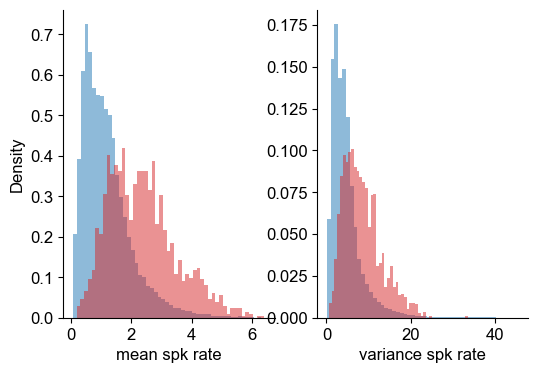

In [25]:
nn = m.interp_spks.shape[0]
mean = m._spks.mean(axis=1)
var = m._spks.var(axis=1)
plt.figure(figsize=(6, 4))
ex = np.logical_not(isredcell[:,0]).astype(bool)
inh = isredcell[:,0].astype(bool)
plt.subplot(121)
plt.hist(mean[ex], bins=50, alpha=0.5, label='excitatory cells', color='tab:blue', density=True);
plt.hist(mean[inh], bins=50, alpha=0.5, label='inhibitory cells', color='tab:red', density=True);
plt.xlabel("mean spk rate")
plt.ylabel("Density")
plt.subplot(122)
plt.hist(var[ex], bins=50, alpha=0.5, label='excitatory cells', color='tab:blue', density=True);
plt.hist(var[inh], bins=50, alpha=0.5, label='inhibitory cells', color='tab:red', density=True);
plt.xlabel("variance spk rate")

Fixing mice objs:

In [26]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_15', 'blk':'4'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_16', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_01', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_04', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_05', 'blk':'3'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_15', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_10_15', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_10_16', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_23', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_15', 'blk':'3'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_16', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_11_01', 'blk':'3'})
all_sessions = VG11 + VG14 + VG15
all_sessions

[{'mname': 'VG11', 'datexp': '2024_10_15', 'blk': '4'},
 {'mname': 'VG11', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_01', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_04', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_05', 'blk': '3'},
 {'mname': 'VG11', 'datexp': '2024_11_14', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_21', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_23', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_15', 'blk': '3'},
 {'mname': 'VG15', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_11_01', 'blk': '3'}]

In [36]:
main_root = r"Z:\data\PROC"
for sess in all_sessions:
    mname = sess['mname']
    datexp = sess['datexp']
    blk = sess['blk']
    print(f"fixing {mname} {datexp} {blk}")
    fix_red_detection(main_root, mname, datexp, blk)

fixing red detection for animal VG15, datexp 2024_11_01, block 3, plane 19
Fixed!
